In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Sonar data.csv', header=None)

In [3]:
data.shape

(208, 61)

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [6]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [7]:
X = data.drop(columns=60,axis=1)
y = data[60]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

In [9]:
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(208, 60) (187, 60) (21, 60)
(208,) (187,) (21,)


Logistic Regression

In [10]:
model1 = LogisticRegression()

In [11]:
model1.fit(X_train,y_train)

LogisticRegression()

In [12]:
predictions1 = model1.predict(X_test)

In [13]:
error1 = accuracy_score(predictions1,y_test)

In [14]:
print(error1)

0.8095238095238095


Decision Tree Classifier

In [15]:
model2 = DecisionTreeClassifier(random_state=1)

In [16]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
predictions2 = model2.predict(X_test)

In [18]:
error2 = accuracy_score(predictions2,y_test)

In [19]:
print(error2)

0.5238095238095238


Random Forest Classifier

In [20]:
model3 = RandomForestClassifier(n_estimators=50,random_state=2)

In [21]:
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [22]:
predictions3 = model3.predict(X_test)

In [23]:
error3 = accuracy_score(predictions3,y_test)

In [24]:
print(error3)

0.8571428571428571


[Text(0.5, 0, 'Models'), Text(0, 0.5, 'Accuracy')]

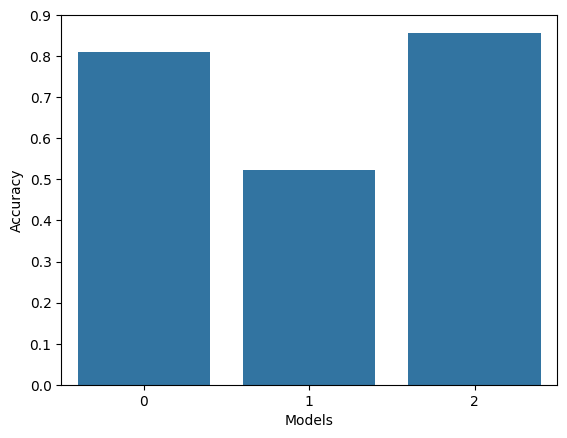

In [26]:
fig = sns.barplot(data=[error1,error2,error3])
fig.set(xlabel='Models',ylabel='Accuracy')